## Ted's Analysis

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, cross_validate, ShuffleSplit
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

###  I've been having issues with the test data not matching up with the train data, and after mucho mucho trial and error, I've been able to determine that there is one single entry in the entire 22000 listed that has a "grade" of "3 Poor".  When samples are split into train and test sets, one gets the single, the other does not.  This results is mismatched columns/rows at the end of the process, which was super frustrating, but easy to fix here:

In [7]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [8]:
df = df[df['grade'] != "3 Poor"]

In [9]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
Name: grade, dtype: int64

####  Now that that one is gone, we can proceed without too much problem hopefully:

##  If we are looking at just the high-end properties, I will chop off everything below 1 std above the mean:

F:\Flatiron\Anaconda2\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


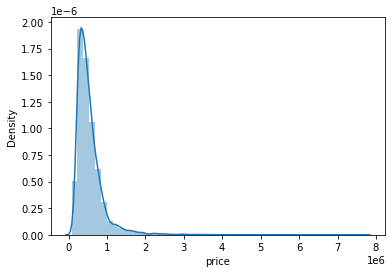

In [10]:
sns.distplot(df['price']);

In [11]:
price_mean = df['price'].mean()
price_median = df['price'].median()
price_std = df['price'].std()
print("Price mean:  " + str(round(price_mean, 0)) + "   Price stdev:  " + str(round(price_std, 0)))
print("Price median:  " + str(round(price_median,0)))

Price mean:  540309.0   Price stdev:  367372.0
Price median:  450000.0


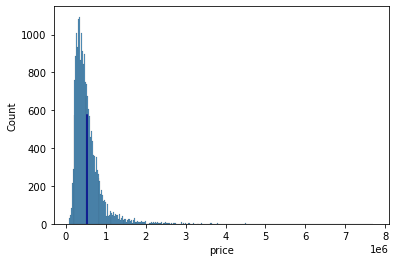

In [12]:
sns.histplot(df['price'])
plt.legend
plt.axvline(price_mean, 0, 0.5, color = "darkblue");

In [13]:
df = df[df['price'] > (price_mean + price_std)]

### I also need to drop a few categories from "Condition" or a few things downstream are not going to work right either:

In [14]:
df = df[df['condition'] != "Fair"]

In [15]:
df = df[df['condition'] != "Poor"]

In [16]:
df['condition'].value_counts()

Average      1296
Good          466
Very Good     238
Name: condition, dtype: int64

# The prediction target is price

In [17]:
y = df['price']
X = df.drop('price',axis=1)

In [18]:
##  sklearn model_selection train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [19]:
print(f"X_train is a DataFram with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFram with 1500 rows and 20 columns
y_train is a Series with 1500 values


In [20]:
print(f"X_test is a DataFram with {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_test is a Series with {y_test.shape[0]} values")

X_test is a DataFram with 500 rows and 20 columns
y_test is a Series with 500 values


In [21]:
##  sklearn linear_model LinearRegression:  Should fail at this point and it does, so it is
##    commented out.  This includes ALL, non-converted data, so it needs lots of cleaning

model = LinearRegression()
# model.fit(X_train, y_train)

In [22]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16474,9542100005,10/24/2014,5,3.00,3690,10260,1.0,NO,EXCELLENT,Good,9 Better,2070,1620.0,1967,0.0,98005,47.5919,-122.176,3160,14000
7847,9129100040,8/25/2014,4,3.25,3320,8587,3.0,NO,NONE,Average,11 Excellent,2950,370.0,2008,0.0,98103,47.6910,-122.337,1860,5668
6956,3885806105,5/21/2014,3,3.25,3690,7200,2.0,NO,NONE,Average,11 Excellent,3690,0.0,2007,0.0,98033,47.6815,-122.200,1880,7200
19336,2525049113,7/25/2014,4,3.50,4065,18713,2.0,NO,NONE,Good,10 Very Good,4065,0.0,1987,0.0,98039,47.6209,-122.237,3070,18713
15338,1238501188,8/8/2014,4,2.50,2910,9131,2.0,NO,NONE,Average,10 Very Good,2910,0.0,2014,NaN,98033,47.6826,-122.186,1880,11212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,5/22/2014,4,2.75,2080,4000,1.5,NO,NONE,Average,8 Good,2080,0.0,1912,2000.0,98107,47.6737,-122.358,1730,5000
7045,3224510290,10/16/2014,3,1.75,3670,11884,1.0,NO,AVERAGE,Good,9 Better,1950,1720.0,1979,0.0,98006,47.5604,-122.133,3020,9747
21552,524059330,1/30/2015,4,3.50,3830,8963,2.0,NO,NONE,Average,10 Very Good,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
14180,2493200155,4/3/2015,4,2.25,2770,5320,2.0,NO,FAIR,Average,9 Better,2440,330.0,2013,0.0,98136,47.5283,-122.385,2100,6011


###  Converting the sell date ("date") to a sortable integer

In [23]:
# ##  Change date format, but keep, in case we want to use it later

date_num = []
for date in X_train['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_train['date_num'] = date_num

<ipython-input-23-74e9c2404cf9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['date_num'] = date_num


#### Dropping the sell date so a regression can still be performed

In [24]:
###  Date and other columns to drop(lat and long) - not useful for this analysis
lat_long = ['lat','long','date']
X_train = X_train.drop(lat_long, axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_num
16474,9542100005,5,3.00,3690,10260,1.0,NO,EXCELLENT,Good,9 Better,2070,1620.0,1967,0.0,98005,3160,14000,201401
7847,9129100040,4,3.25,3320,8587,3.0,NO,NONE,Average,11 Excellent,2950,370.0,2008,0.0,98103,1860,5668,201408
6956,3885806105,3,3.25,3690,7200,2.0,NO,NONE,Average,11 Excellent,3690,0.0,2007,0.0,98033,1880,7200,201405
19336,2525049113,4,3.50,4065,18713,2.0,NO,NONE,Good,10 Very Good,4065,0.0,1987,0.0,98039,3070,18713,201407
15338,1238501188,4,2.50,2910,9131,2.0,NO,NONE,Average,10 Very Good,2910,0.0,2014,NaN,98033,1880,11212,201408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,NO,NONE,Average,8 Good,2080,0.0,1912,2000.0,98107,1730,5000,201405
7045,3224510290,3,1.75,3670,11884,1.0,NO,AVERAGE,Good,9 Better,1950,1720.0,1979,0.0,98006,3020,9747,201401
21552,524059330,4,3.50,3830,8963,2.0,NO,NONE,Average,10 Very Good,3120,710.0,2014,0.0,98004,2190,10777,201501
14180,2493200155,4,2.25,2770,5320,2.0,NO,FAIR,Average,9 Better,2440,330.0,2013,0.0,98136,2100,6011,201504


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1351 non-null   object 
 7   view           1495 non-null   object 
 8   condition      1500 non-null   object 
 9   grade          1500 non-null   object 
 10  sqft_above     1500 non-null   int64  
 11  sqft_basement  1500 non-null   object 
 12  yr_built       1500 non-null   int64  
 13  yr_renovated   1238 non-null   float64
 14  zipcode        1500 non-null   int64  
 15  sqft_living15  1500 non-null   int64  
 16  sqft_lot15     1500 non-null   int64  
 17  date_num       1500 non-null   int64  
dtypes: 

In [26]:
X_train['waterfront'].value_counts()

NO     1273
YES      78
Name: waterfront, dtype: int64

In [27]:
X_train.isna().sum()

id                 0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront       149
view               5
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated     262
zipcode            0
sqft_living15      0
sqft_lot15         0
date_num           0
dtype: int64

Since there are 1822 listing with "waterfront" missing, but less than 1% of listed homes have a waterfront access, these seem like infrequent enough cases that we will fill in the waterfront NaNs with "NO" instead

In [28]:
X_train['waterfront'] = X_train['waterfront'].fillna("NO")

In [29]:
X_train.isna().sum()

id                 0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               5
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated     262
zipcode            0
sqft_living15      0
sqft_lot15         0
date_num           0
dtype: int64

Doing the same thing with the "view column now:

In [30]:
X_train['view'].value_counts()

NONE         919
AVERAGE      189
EXCELLENT    168
GOOD         154
FAIR          65
Name: view, dtype: int64

We will go with the mode of this to replace the 49 missing values, as this is the likely case.

In [31]:
X_train['view'] = X_train['view'].fillna("NONE")

In [32]:
X_train.isna().sum()

id                 0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated     262
zipcode            0
sqft_living15      0
sqft_lot15         0
date_num           0
dtype: int64

In [33]:
X_train['yr_renovated'].value_counts()

0.0       1105
2003.0      10
2014.0       8
2000.0       8
2005.0       7
2008.0       7
2004.0       6
2001.0       6
2007.0       6
2002.0       6
2013.0       5
1998.0       5
2006.0       4
1999.0       4
1990.0       4
1994.0       4
2009.0       4
1993.0       3
1987.0       3
1989.0       3
2010.0       3
1992.0       3
1995.0       3
1997.0       2
1983.0       2
1956.0       2
1984.0       2
1977.0       1
1988.0       1
1968.0       1
1991.0       1
1996.0       1
1982.0       1
1979.0       1
1965.0       1
2015.0       1
1980.0       1
2012.0       1
1958.0       1
1963.0       1
Name: yr_renovated, dtype: int64

#### Very few homes from this list have been renovated.  The 0 values may have never been renovated, but we can't know that for sure.  Since there are so many 0s and so many missing entries, the column itself needs to be dropped.  If we want to add it back later, we'll have to address these issues.

In [34]:
X_train = X_train.drop('yr_renovated', axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num
16474,9542100005,5,3.00,3690,10260,1.0,NO,EXCELLENT,Good,9 Better,2070,1620.0,1967,98005,3160,14000,201401
7847,9129100040,4,3.25,3320,8587,3.0,NO,NONE,Average,11 Excellent,2950,370.0,2008,98103,1860,5668,201408
6956,3885806105,3,3.25,3690,7200,2.0,NO,NONE,Average,11 Excellent,3690,0.0,2007,98033,1880,7200,201405
19336,2525049113,4,3.50,4065,18713,2.0,NO,NONE,Good,10 Very Good,4065,0.0,1987,98039,3070,18713,201407
15338,1238501188,4,2.50,2910,9131,2.0,NO,NONE,Average,10 Very Good,2910,0.0,2014,98033,1880,11212,201408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,NO,NONE,Average,8 Good,2080,0.0,1912,98107,1730,5000,201405
7045,3224510290,3,1.75,3670,11884,1.0,NO,AVERAGE,Good,9 Better,1950,1720.0,1979,98006,3020,9747,201401
21552,524059330,4,3.50,3830,8963,2.0,NO,NONE,Average,10 Very Good,3120,710.0,2014,98004,2190,10777,201501
14180,2493200155,4,2.25,2770,5320,2.0,NO,FAIR,Average,9 Better,2440,330.0,2013,98136,2100,6011,201504


In [35]:
X_train.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
date_num         0
dtype: int64

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1500 non-null   object 
 7   view           1500 non-null   object 
 8   condition      1500 non-null   object 
 9   grade          1500 non-null   object 
 10  sqft_above     1500 non-null   int64  
 11  sqft_basement  1500 non-null   object 
 12  yr_built       1500 non-null   int64  
 13  zipcode        1500 non-null   int64  
 14  sqft_living15  1500 non-null   int64  
 15  sqft_lot15     1500 non-null   int64  
 16  date_num       1500 non-null   int64  
dtypes: float64(2), int64(10), object(5)
memory usag

In [37]:
X_train['sqft_basement'].value_counts()

0.0       636
?          28
1000.0     22
800.0      17
700.0      16
         ... 
130.0       1
2580.0      1
2250.0      1
515.0       1
1910.0      1
Name: sqft_basement, Length: 224, dtype: int64

#### There are many 0 values, which likely means no basement.  I am going to make an assumption that the ? values have no basements, so I will change those to 0.  We can worry about the inclusion of the basement ft$^2$ later

In [38]:
basement_train = X_train[["sqft_basement"]]
missing_indicator = MissingIndicator("?")
missing_indicator.fit(basement_train)
basement_missing_train = missing_indicator.transform(basement_train)
basement_missing_train

F:\Flatiron\Anaconda2\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass missing_values=? as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [39]:
X_train["basement_?"] = basement_missing_train

In [40]:
zero = float(0)
X_train = X_train.replace("?",int(zero))
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
16474,9542100005,5,3.00,3690,10260,1.0,NO,EXCELLENT,Good,9 Better,2070,1620.0,1967,98005,3160,14000,201401,False
7847,9129100040,4,3.25,3320,8587,3.0,NO,NONE,Average,11 Excellent,2950,370.0,2008,98103,1860,5668,201408,False
6956,3885806105,3,3.25,3690,7200,2.0,NO,NONE,Average,11 Excellent,3690,0.0,2007,98033,1880,7200,201405,False
19336,2525049113,4,3.50,4065,18713,2.0,NO,NONE,Good,10 Very Good,4065,0.0,1987,98039,3070,18713,201407,False
15338,1238501188,4,2.50,2910,9131,2.0,NO,NONE,Average,10 Very Good,2910,0.0,2014,98033,1880,11212,201408,False


In [41]:
X_train['sqft_basement'] = pd.to_numeric(X_train['sqft_basement'], downcast="float")

In [42]:
X_train['sqft_basement'] = X_train['sqft_basement'].astype(float)

In [43]:
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
16474,9542100005,5,3.00,3690,10260,1.0,NO,EXCELLENT,Good,9 Better,2070,1620.0,1967,98005,3160,14000,201401,False
7847,9129100040,4,3.25,3320,8587,3.0,NO,NONE,Average,11 Excellent,2950,370.0,2008,98103,1860,5668,201408,False
6956,3885806105,3,3.25,3690,7200,2.0,NO,NONE,Average,11 Excellent,3690,0.0,2007,98033,1880,7200,201405,False
19336,2525049113,4,3.50,4065,18713,2.0,NO,NONE,Good,10 Very Good,4065,0.0,1987,98039,3070,18713,201407,False
15338,1238501188,4,2.50,2910,9131,2.0,NO,NONE,Average,10 Very Good,2910,0.0,2014,98033,1880,11212,201408,False


In [44]:
# Modeling still doesn't work, need to deal with the other categorical problems

#model.fit(X_train, y_train)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1500 non-null   object 
 7   view           1500 non-null   object 
 8   condition      1500 non-null   object 
 9   grade          1500 non-null   object 
 10  sqft_above     1500 non-null   int64  
 11  sqft_basement  1500 non-null   float64
 12  yr_built       1500 non-null   int64  
 13  zipcode        1500 non-null   int64  
 14  sqft_living15  1500 non-null   int64  
 15  sqft_lot15     1500 non-null   int64  
 16  date_num       1500 non-null   int64  
 17  basement_?     1500 non-null   bool   
dtypes: 

In [46]:
print(X_train['waterfront'].value_counts())
print()
print(X_train['view'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())


NO     1422
YES      78
Name: waterfront, dtype: int64

NONE         924
AVERAGE      189
EXCELLENT    168
GOOD         154
FAIR          65
Name: view, dtype: int64

Average      967
Good         354
Very Good    179
Name: condition, dtype: int64

9 Better         454
10 Very Good     432
11 Excellent     267
8 Good           223
12 Luxury         64
7 Average         44
13 Mansion        11
6 Low Average      5
Name: grade, dtype: int64


### Binary Category:  Waterfront

In [47]:
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [48]:
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
X_train['waterfront'] = waterfront_encoded_train
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
16474,9542100005,5,3.00,3690,10260,1.0,0.0,EXCELLENT,Good,9 Better,2070,1620.0,1967,98005,3160,14000,201401,False
7847,9129100040,4,3.25,3320,8587,3.0,0.0,NONE,Average,11 Excellent,2950,370.0,2008,98103,1860,5668,201408,False
6956,3885806105,3,3.25,3690,7200,2.0,0.0,NONE,Average,11 Excellent,3690,0.0,2007,98033,1880,7200,201405,False
19336,2525049113,4,3.50,4065,18713,2.0,0.0,NONE,Good,10 Very Good,4065,0.0,1987,98039,3070,18713,201407,False
15338,1238501188,4,2.50,2910,9131,2.0,0.0,NONE,Average,10 Very Good,2910,0.0,2014,98033,1880,11212,201408,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,NONE,Average,8 Good,2080,0.0,1912,98107,1730,5000,201405,False
7045,3224510290,3,1.75,3670,11884,1.0,0.0,AVERAGE,Good,9 Better,1950,1720.0,1979,98006,3020,9747,201401,False
21552,524059330,4,3.50,3830,8963,2.0,0.0,NONE,Average,10 Very Good,3120,710.0,2014,98004,2190,10777,201501,False
14180,2493200155,4,2.25,2770,5320,2.0,0.0,FAIR,Average,9 Better,2440,330.0,2013,98136,2100,6011,201504,False


In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1500 non-null   float64
 7   view           1500 non-null   object 
 8   condition      1500 non-null   object 
 9   grade          1500 non-null   object 
 10  sqft_above     1500 non-null   int64  
 11  sqft_basement  1500 non-null   float64
 12  yr_built       1500 non-null   int64  
 13  zipcode        1500 non-null   int64  
 14  sqft_living15  1500 non-null   int64  
 15  sqft_lot15     1500 non-null   int64  
 16  date_num       1500 non-null   int64  
 17  basement_?     1500 non-null   bool   
dtypes: 

In [51]:
encoder_basement_missing = OrdinalEncoder()
encoder_basement_missing.fit(basement_missing_train)
encoder_basement_missing.categories_[0]

array([False,  True])

In [52]:
basement_missing_encoded_train = encoder_basement_missing.transform(basement_missing_train)
basement_missing_encoded_train = basement_missing_encoded_train.flatten()
basement_missing_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
X_train['basement_?'] = basement_missing_encoded_train
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
16474,9542100005,5,3.00,3690,10260,1.0,0.0,EXCELLENT,Good,9 Better,2070,1620.0,1967,98005,3160,14000,201401,0.0
7847,9129100040,4,3.25,3320,8587,3.0,0.0,NONE,Average,11 Excellent,2950,370.0,2008,98103,1860,5668,201408,0.0
6956,3885806105,3,3.25,3690,7200,2.0,0.0,NONE,Average,11 Excellent,3690,0.0,2007,98033,1880,7200,201405,0.0
19336,2525049113,4,3.50,4065,18713,2.0,0.0,NONE,Good,10 Very Good,4065,0.0,1987,98039,3070,18713,201407,0.0
15338,1238501188,4,2.50,2910,9131,2.0,0.0,NONE,Average,10 Very Good,2910,0.0,2014,98033,1880,11212,201408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,NONE,Average,8 Good,2080,0.0,1912,98107,1730,5000,201405,0.0
7045,3224510290,3,1.75,3670,11884,1.0,0.0,AVERAGE,Good,9 Better,1950,1720.0,1979,98006,3020,9747,201401,0.0
21552,524059330,4,3.50,3830,8963,2.0,0.0,NONE,Average,10 Very Good,3120,710.0,2014,98004,2190,10777,201501,0.0
14180,2493200155,4,2.25,2770,5320,2.0,0.0,FAIR,Average,9 Better,2440,330.0,2013,98136,2100,6011,201504,0.0


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1500 non-null   float64
 7   view           1500 non-null   object 
 8   condition      1500 non-null   object 
 9   grade          1500 non-null   object 
 10  sqft_above     1500 non-null   int64  
 11  sqft_basement  1500 non-null   float64
 12  yr_built       1500 non-null   int64  
 13  zipcode        1500 non-null   int64  
 14  sqft_living15  1500 non-null   int64  
 15  sqft_lot15     1500 non-null   int64  
 16  date_num       1500 non-null   int64  
 17  basement_?     1500 non-null   float64
dtypes: 

###  Now it's time for the multiple category fixes:  VIEW

In [55]:
## One Hot Encoder

view_train = X_train[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_train)
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [56]:
view_encoded_train = ohe.transform(view_train)
view_encoded_train

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [57]:
view_encoded_train = pd.DataFrame(view_encoded_train, columns=ohe.categories_[0], index=X_train.index)
view_encoded_train

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
16474,0.0,1.0,0.0,0.0,0.0
7847,0.0,0.0,0.0,0.0,1.0
6956,0.0,0.0,0.0,0.0,1.0
19336,0.0,0.0,0.0,0.0,1.0
15338,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
18302,0.0,0.0,0.0,0.0,1.0
7045,1.0,0.0,0.0,0.0,0.0
21552,0.0,0.0,0.0,0.0,1.0
14180,0.0,0.0,1.0,0.0,0.0


In [58]:
X_train.drop("view", axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
16474,9542100005,5,3.00,3690,10260,1.0,0.0,Good,9 Better,2070,1620.0,1967,98005,3160,14000,201401,0.0
7847,9129100040,4,3.25,3320,8587,3.0,0.0,Average,11 Excellent,2950,370.0,2008,98103,1860,5668,201408,0.0
6956,3885806105,3,3.25,3690,7200,2.0,0.0,Average,11 Excellent,3690,0.0,2007,98033,1880,7200,201405,0.0
19336,2525049113,4,3.50,4065,18713,2.0,0.0,Good,10 Very Good,4065,0.0,1987,98039,3070,18713,201407,0.0
15338,1238501188,4,2.50,2910,9131,2.0,0.0,Average,10 Very Good,2910,0.0,2014,98033,1880,11212,201408,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,Average,8 Good,2080,0.0,1912,98107,1730,5000,201405,0.0
7045,3224510290,3,1.75,3670,11884,1.0,0.0,Good,9 Better,1950,1720.0,1979,98006,3020,9747,201401,0.0
21552,524059330,4,3.50,3830,8963,2.0,0.0,Average,10 Very Good,3120,710.0,2014,98004,2190,10777,201501,0.0
14180,2493200155,4,2.25,2770,5320,2.0,0.0,Average,9 Better,2440,330.0,2013,98136,2100,6011,201504,0.0


In [59]:
X_train = pd.concat([X_train, view_encoded_train],axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode,sqft_living15,sqft_lot15,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
16474,9542100005,5,3.00,3690,10260,1.0,0.0,Good,9 Better,2070,...,98005,3160,14000,201401,0.0,0.0,1.0,0.0,0.0,0.0
7847,9129100040,4,3.25,3320,8587,3.0,0.0,Average,11 Excellent,2950,...,98103,1860,5668,201408,0.0,0.0,0.0,0.0,0.0,1.0
6956,3885806105,3,3.25,3690,7200,2.0,0.0,Average,11 Excellent,3690,...,98033,1880,7200,201405,0.0,0.0,0.0,0.0,0.0,1.0
19336,2525049113,4,3.50,4065,18713,2.0,0.0,Good,10 Very Good,4065,...,98039,3070,18713,201407,0.0,0.0,0.0,0.0,0.0,1.0
15338,1238501188,4,2.50,2910,9131,2.0,0.0,Average,10 Very Good,2910,...,98033,1880,11212,201408,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,Average,8 Good,2080,...,98107,1730,5000,201405,0.0,0.0,0.0,0.0,0.0,1.0
7045,3224510290,3,1.75,3670,11884,1.0,0.0,Good,9 Better,1950,...,98006,3020,9747,201401,0.0,1.0,0.0,0.0,0.0,0.0
21552,524059330,4,3.50,3830,8963,2.0,0.0,Average,10 Very Good,3120,...,98004,2190,10777,201501,0.0,0.0,0.0,0.0,0.0,1.0
14180,2493200155,4,2.25,2770,5320,2.0,0.0,Average,9 Better,2440,...,98136,2100,6011,201504,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1500 non-null   float64
 7   condition      1500 non-null   object 
 8   grade          1500 non-null   object 
 9   sqft_above     1500 non-null   int64  
 10  sqft_basement  1500 non-null   float64
 11  yr_built       1500 non-null   int64  
 12  zipcode        1500 non-null   int64  
 13  sqft_living15  1500 non-null   int64  
 14  sqft_lot15     1500 non-null   int64  
 15  date_num       1500 non-null   int64  
 16  basement_?     1500 non-null   float64
 17  AVERAGE        1500 non-null   float64
 18  EXC

### CONDITION:

In [61]:
condition_train = X_train[['condition']]
ohe.fit(condition_train)
ohe.categories_

[array(['Average', 'Good', 'Very Good'], dtype=object)]

In [62]:
condition_encoded_train = ohe.transform(condition_train)
condition_encoded_train = pd.DataFrame(condition_encoded_train, columns=ohe.categories_[0],index=X_train.index)
condition_encoded_train

,Average,Good,Very Good
16474,0.0,1.0,0.0
7847,1.0,0.0,0.0
6956,1.0,0.0,0.0
19336,0.0,1.0,0.0
15338,1.0,0.0,0.0
...,...,...,...
18302,1.0,0.0,0.0
7045,0.0,1.0,0.0
21552,1.0,0.0,0.0
14180,1.0,0.0,0.0


In [63]:
X_train.drop('condition', axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,zipcode,sqft_living15,sqft_lot15,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
16474,9542100005,5,3.00,3690,10260,1.0,0.0,9 Better,2070,1620.0,...,98005,3160,14000,201401,0.0,0.0,1.0,0.0,0.0,0.0
7847,9129100040,4,3.25,3320,8587,3.0,0.0,11 Excellent,2950,370.0,...,98103,1860,5668,201408,0.0,0.0,0.0,0.0,0.0,1.0
6956,3885806105,3,3.25,3690,7200,2.0,0.0,11 Excellent,3690,0.0,...,98033,1880,7200,201405,0.0,0.0,0.0,0.0,0.0,1.0
19336,2525049113,4,3.50,4065,18713,2.0,0.0,10 Very Good,4065,0.0,...,98039,3070,18713,201407,0.0,0.0,0.0,0.0,0.0,1.0
15338,1238501188,4,2.50,2910,9131,2.0,0.0,10 Very Good,2910,0.0,...,98033,1880,11212,201408,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,8 Good,2080,0.0,...,98107,1730,5000,201405,0.0,0.0,0.0,0.0,0.0,1.0
7045,3224510290,3,1.75,3670,11884,1.0,0.0,9 Better,1950,1720.0,...,98006,3020,9747,201401,0.0,1.0,0.0,0.0,0.0,0.0
21552,524059330,4,3.50,3830,8963,2.0,0.0,10 Very Good,3120,710.0,...,98004,2190,10777,201501,0.0,0.0,0.0,0.0,0.0,1.0
14180,2493200155,4,2.25,2770,5320,2.0,0.0,9 Better,2440,330.0,...,98136,2100,6011,201504,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
X_train = pd.concat([X_train, condition_encoded_train], axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Good,Very Good
16474,9542100005,5,3.00,3690,10260,1.0,0.0,9 Better,2070,1620.0,...,201401,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7847,9129100040,4,3.25,3320,8587,3.0,0.0,11 Excellent,2950,370.0,...,201408,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6956,3885806105,3,3.25,3690,7200,2.0,0.0,11 Excellent,3690,0.0,...,201405,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19336,2525049113,4,3.50,4065,18713,2.0,0.0,10 Very Good,4065,0.0,...,201407,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15338,1238501188,4,2.50,2910,9131,2.0,0.0,10 Very Good,2910,0.0,...,201408,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,8 Good,2080,0.0,...,201405,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7045,3224510290,3,1.75,3670,11884,1.0,0.0,9 Better,1950,1720.0,...,201401,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21552,524059330,4,3.50,3830,8963,2.0,0.0,10 Very Good,3120,710.0,...,201501,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14180,2493200155,4,2.25,2770,5320,2.0,0.0,9 Better,2440,330.0,...,201504,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1500 non-null   float64
 7   grade          1500 non-null   object 
 8   sqft_above     1500 non-null   int64  
 9   sqft_basement  1500 non-null   float64
 10  yr_built       1500 non-null   int64  
 11  zipcode        1500 non-null   int64  
 12  sqft_living15  1500 non-null   int64  
 13  sqft_lot15     1500 non-null   int64  
 14  date_num       1500 non-null   int64  
 15  basement_?     1500 non-null   float64
 16  AVERAGE        1500 non-null   float64
 17  EXCELLENT      1500 non-null   float64
 18  FAI

###  Last one, GRADE

In [66]:
grade_train = X_train[['grade']]
ohe.fit(grade_train)
ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion',
        '6 Low Average', '7 Average', '8 Good', '9 Better'], dtype=object)]

In [67]:
grade_encoded_train = ohe.transform(grade_train)
grade_encoded_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [68]:
grade_encoded_train = pd.DataFrame(grade_encoded_train, columns=ohe.categories_[0], index=X_train.index)
grade_encoded_train

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
16474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7847,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6956,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15338,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18302,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21552,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
X_train.drop("grade", axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Good,Very Good
16474,9542100005,5,3.00,3690,10260,1.0,0.0,2070,1620.0,1967,...,201401,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7847,9129100040,4,3.25,3320,8587,3.0,0.0,2950,370.0,2008,...,201408,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6956,3885806105,3,3.25,3690,7200,2.0,0.0,3690,0.0,2007,...,201405,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19336,2525049113,4,3.50,4065,18713,2.0,0.0,4065,0.0,1987,...,201407,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15338,1238501188,4,2.50,2910,9131,2.0,0.0,2910,0.0,2014,...,201408,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,2080,0.0,1912,...,201405,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7045,3224510290,3,1.75,3670,11884,1.0,0.0,1950,1720.0,1979,...,201401,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21552,524059330,4,3.50,3830,8963,2.0,0.0,3120,710.0,2014,...,201501,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
14180,2493200155,4,2.25,2770,5320,2.0,0.0,2440,330.0,2013,...,201504,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [70]:
X_train = pd.concat([X_train, grade_encoded_train], axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
16474,9542100005,5,3.00,3690,10260,1.0,0.0,2070,1620.0,1967,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7847,9129100040,4,3.25,3320,8587,3.0,0.0,2950,370.0,2008,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6956,3885806105,3,3.25,3690,7200,2.0,0.0,3690,0.0,2007,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19336,2525049113,4,3.50,4065,18713,2.0,0.0,4065,0.0,1987,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15338,1238501188,4,2.50,2910,9131,2.0,0.0,2910,0.0,2014,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,9287802380,4,2.75,2080,4000,1.5,0.0,2080,0.0,1912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7045,3224510290,3,1.75,3670,11884,1.0,0.0,1950,1720.0,1979,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21552,524059330,4,3.50,3830,8963,2.0,0.0,3120,710.0,2014,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14180,2493200155,4,2.25,2770,5320,2.0,0.0,2440,330.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 16474 to 12314
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1500 non-null   int64  
 1   bedrooms       1500 non-null   int64  
 2   bathrooms      1500 non-null   float64
 3   sqft_living    1500 non-null   int64  
 4   sqft_lot       1500 non-null   int64  
 5   floors         1500 non-null   float64
 6   waterfront     1500 non-null   float64
 7   sqft_above     1500 non-null   int64  
 8   sqft_basement  1500 non-null   float64
 9   yr_built       1500 non-null   int64  
 10  zipcode        1500 non-null   int64  
 11  sqft_living15  1500 non-null   int64  
 12  sqft_lot15     1500 non-null   int64  
 13  date_num       1500 non-null   int64  
 14  basement_?     1500 non-null   float64
 15  AVERAGE        1500 non-null   float64
 16  EXCELLENT      1500 non-null   float64
 17  FAIR           1500 non-null   float64
 18  GOO

# FINALLY DONE!! with cleaning anyways....

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.50578002, 0.52801304, 0.46143949])

## Run Test data now too, just to see

In [74]:
date_num = []
for date in X_test['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_test['date_num'] = date_num

lat_long = ['lat','long','date']
X_test = X_test.drop(lat_long, axis=1)

X_test['waterfront'] = X_test['waterfront'].fillna("NO")
X_test['view'] = X_test['view'].fillna("NONE")

X_test = X_test.drop('yr_renovated', axis=1)

basement_test = X_test[["sqft_basement"]]
missing_indicator.fit(basement_test)
basement_missing_test = missing_indicator.transform(basement_test)

X_test["basement_?"] = basement_missing_test
zero = float(0)
X_test = X_test.replace("?",int(zero))
X_test['sqft_basement'] = pd.to_numeric(X_test['sqft_basement'], downcast="float")
X_test['sqft_basement'] = X_test['sqft_basement'].astype(float)

waterfront_test = X_test[['waterfront']]
encoder_waterfront.fit(waterfront_test)
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)
waterfront_encoded_test = waterfront_encoded_test.flatten()
X_test['waterfront'] = waterfront_encoded_test

encoder_basement_missing.fit(basement_missing_test)
basement_missing_encoded_test = encoder_basement_missing.transform(basement_missing_test)
basement_missing_encoded_test = basement_missing_encoded_test.flatten()
X_test['basement_?'] = basement_missing_encoded_test

view_test = X_test[['view']]
ohe.fit(view_test)
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(view_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test],axis=1)

condition_test = X_test[['condition']]
ohe.fit(condition_test)
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(condition_encoded_test, columns=ohe.categories_[0],index=X_test.index)
X_test.drop('condition', axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

grade_test = X_test[['grade']]
ohe.fit(grade_test)
grade_encoded_test = ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(grade_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("grade", axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)



<ipython-input-74-11694acdf721>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['date_num'] = date_num


In [75]:
X_test

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
15199,1651800010,4,1.75,2610,21600,1.0,0.0,2610,0.0,1966,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6506,1250204835,4,3.00,3330,6990,1.5,0.0,2330,1000.0,1928,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16830,8823900290,9,4.00,4620,5508,2.5,0.0,3870,750.0,1915,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
66,3394100030,4,2.50,2720,11049,2.0,0.0,2720,0.0,1989,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5060,4385700660,3,1.50,2560,4000,1.5,0.0,1660,900.0,1927,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,622049114,3,2.50,5403,24069,2.0,1.0,5403,0.0,1976,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8853,2524049257,4,2.25,4250,16940,1.0,0.0,2380,1870.0,1974,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3757,2540700110,4,3.50,4210,18564,2.0,0.0,4210,0.0,2001,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14808,3623500408,3,3.00,3410,16015,2.0,1.0,2220,1190.0,1973,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
X_test.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.984279e+09,4.042000,3.037000,3555.780000,22717.776000,1.782000,0.054000,2929.588000,613.012000,1972.392000,...,0.22400,0.118000,0.284000,0.168000,0.046000,0.004000,0.002000,0.038000,0.172000,0.286000
std,2.792337e+09,0.919743,0.850928,1092.429115,67682.760972,0.500977,0.226244,1100.454851,638.170136,32.935693,...,0.41734,0.322931,0.451388,0.374241,0.209695,0.063182,0.044721,0.191388,0.377758,0.452342
min,3.100016e+07,2.000000,1.000000,1290.000000,1344.000000,1.000000,0.000000,930.000000,0.000000,1900.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.624627e+09,3.000000,2.500000,2777.500000,6363.000000,1.500000,0.000000,2027.500000,0.000000,1949.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.303850e+09,4.000000,3.000000,3420.000000,10302.000000,2.000000,0.000000,2735.000000,595.000000,1980.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.401627e+09,5.000000,3.500000,4222.500000,17555.000000,2.000000,0.000000,3642.500000,1052.500000,2001.250000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.831200e+09,9.000000,6.500000,9200.000000,982998.000000,3.000000,1.000000,7850.000000,3500.000000,2015.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 15199 to 4294
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             500 non-null    int64  
 1   bedrooms       500 non-null    int64  
 2   bathrooms      500 non-null    float64
 3   sqft_living    500 non-null    int64  
 4   sqft_lot       500 non-null    int64  
 5   floors         500 non-null    float64
 6   waterfront     500 non-null    float64
 7   sqft_above     500 non-null    int64  
 8   sqft_basement  500 non-null    float64
 9   yr_built       500 non-null    int64  
 10  zipcode        500 non-null    int64  
 11  sqft_living15  500 non-null    int64  
 12  sqft_lot15     500 non-null    int64  
 13  date_num       500 non-null    int64  
 14  basement_?     500 non-null    float64
 15  AVERAGE        500 non-null    float64
 16  EXCELLENT      500 non-null    float64
 17  FAIR           500 non-null    float64
 18  GOOD 

In [78]:
# plt.figure(figsize=(15,15))
# sns.heatmap(X_train.corr().abs(), annot=True);

## Scaling the results so we can compare them appropriately

In [79]:
scalar = StandardScaler()
new_X_train = scalar.fit_transform(X_train)
scaled_X_train = pd.DataFrame(data=new_X_train, columns=X_train.columns, index=X_train.index)

In [80]:
new_X_test = scalar.fit_transform(X_test)
scaled_X_test = pd.DataFrame(data=new_X_test, columns=X_test.columns, index=X_test.index)

In [81]:
scaled_X_train.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
count,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,...,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03
mean,1.657933e-16,-1.184238e-18,-2.060574e-16,1.918465e-16,2.368476e-17,-1.965835e-16,4.736952e-18,-5.684342e-17,1.894781e-17,1.004234e-15,...,1.125026e-17,4.381680e-17,2.368476e-17,1.776357e-17,5.151435e-17,-2.960595e-17,-9.473903e-18,4.026409e-17,-4.500104e-17,9.473903e-18
std,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,...,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00
min,-1.503978e+00,-3.442986e+00,-2.425852e+00,-2.082942e+00,-3.848778e-01,-1.674637e+00,-2.342057e-01,-1.894939e+00,-9.045029e-01,-2.334772e+00,...,-5.557882e-01,-3.681079e-01,-6.359987e-01,-4.653440e-01,-2.111119e-01,-8.595062e-02,-5.783149e-02,-1.738384e-01,-4.178852e-01,-6.588129e-01
25%,-8.654798e-01,-2.732528e-02,-6.635897e-01,-6.506732e-01,-2.878798e-01,-6.301649e-01,-2.342057e-01,-7.708278e-01,-9.045029e-01,-6.878528e-01,...,-5.557882e-01,-3.681079e-01,-6.359987e-01,-4.653440e-01,-2.111119e-01,-8.595062e-02,-5.783149e-02,-1.738384e-01,-4.178852e-01,-6.588129e-01
50%,-1.945225e-01,-2.732528e-02,-7.616890e-02,-1.157296e-01,-2.221434e-01,4.143073e-01,-2.342057e-01,-1.396669e-01,-2.196381e-01,3.065134e-01,...,-5.557882e-01,-3.681079e-01,-6.359987e-01,-4.653440e-01,-2.111119e-01,-8.595062e-02,-5.783149e-02,-1.738384e-01,-4.178852e-01,-6.588129e-01
75%,9.006586e-01,-2.732528e-02,5.112519e-01,4.537265e-01,-9.673394e-02,4.143073e-01,-2.342057e-01,6.297045e-01,6.885522e-01,8.658444e-01,...,-5.557882e-01,-3.681079e-01,1.572330e+00,-4.653440e-01,-2.111119e-01,-8.595062e-02,-5.783149e-02,-1.738384e-01,-4.178852e-01,1.517882e+00
max,1.943416e+00,6.803995e+00,5.798039e+00,8.546905e+00,1.494702e+01,3.547724e+00,4.269750e+00,5.890915e+00,6.271689e+00,1.238732e+00,...,1.799247e+00,2.716595e+00,1.572330e+00,2.148948e+00,4.736824e+00,1.163459e+01,1.729162e+01,5.752470e+00,2.393002e+00,1.517882e+00


In [82]:
scaled_X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
16474,1.838955,1.111228,-0.076169,0.048205,-0.224010,-1.674637,-0.234206,-0.872182,1.507412,-0.252818,...,1.799247,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882
7847,1.693792,-0.027325,0.217542,-0.271036,-0.251897,2.503252,-0.234206,-0.061348,-0.353633,1.021214,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
6956,-0.149144,-1.165879,0.217542,0.048205,-0.275016,0.414307,-0.234206,0.620490,-0.904503,0.990140,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
19336,-0.627429,-0.027325,0.511252,0.371759,-0.083112,0.414307,-0.234206,0.966017,-0.904503,0.368661,...,1.799247,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
15338,-1.079630,-0.027325,-0.663590,-0.624789,-0.242829,0.414307,-0.234206,-0.098204,-0.904503,1.207658,...,-0.555788,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813


# Here it is: the first Model Fit!

In [83]:
model.fit(scaled_X_train, y_train)
model.score(scaled_X_test, y_test)

0.47694786360449415

In [84]:
full_comp = pd.concat([scaled_X_train, y_train], axis=1)
full_comp = full_comp[['price'] + [col for col in full_comp.columns if col != 'price']]

In [85]:
scaled_X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
16474,1.838955,1.111228,-0.076169,0.048205,-0.224010,-1.674637,-0.234206,-0.872182,1.507412,-0.252818,...,1.799247,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882
7847,1.693792,-0.027325,0.217542,-0.271036,-0.251897,2.503252,-0.234206,-0.061348,-0.353633,1.021214,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
6956,-0.149144,-1.165879,0.217542,0.048205,-0.275016,0.414307,-0.234206,0.620490,-0.904503,0.990140,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
19336,-0.627429,-0.027325,0.511252,0.371759,-0.083112,0.414307,-0.234206,0.966017,-0.904503,0.368661,...,1.799247,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
15338,-1.079630,-0.027325,-0.663590,-0.624789,-0.242829,0.414307,-0.234206,-0.098204,-0.904503,1.207658,...,-0.555788,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,1.749573,-0.027325,-0.369879,-1.340923,-0.328355,-0.630165,-0.234206,-0.862968,-0.904503,-1.961885,...,-0.555788,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,2.393002,-0.658813
7045,-0.381579,-1.165879,-1.544721,0.030949,-0.196941,-1.674637,-0.234206,-0.982750,1.656296,0.120070,...,1.799247,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882
21552,-1.330745,-0.027325,0.511252,0.168998,-0.245629,0.414307,-0.234206,0.095291,0.152571,1.207658,...,-0.555788,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
14180,-0.638623,-0.027325,-0.957300,-0.745583,-0.306353,0.414307,-0.234206,-0.531263,-0.413187,1.176584,...,-0.555788,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882


In [86]:
full_comp

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,Good,Very Good,10 Very Good,11 Excellent,12 Luxury,13 Mansion,6 Low Average,7 Average,8 Good,9 Better
16474,1130000.0,1.838955,1.111228,-0.076169,0.048205,-0.224010,-1.674637,-0.234206,-0.872182,1.507412,...,1.799247,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882
7847,1000000.0,1.693792,-0.027325,0.217542,-0.271036,-0.251897,2.503252,-0.234206,-0.061348,-0.353633,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
6956,1580000.0,-0.149144,-1.165879,0.217542,0.048205,-0.275016,0.414307,-0.234206,0.620490,-0.904503,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
19336,1950000.0,-0.627429,-0.027325,0.511252,0.371759,-0.083112,0.414307,-0.234206,0.966017,-0.904503,...,1.799247,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
15338,1040000.0,-1.079630,-0.027325,-0.663590,-0.624789,-0.242829,0.414307,-0.234206,-0.098204,-0.904503,...,-0.555788,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,940000.0,1.749573,-0.027325,-0.369879,-1.340923,-0.328355,-0.630165,-0.234206,-0.862968,-0.904503,...,-0.555788,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,2.393002,-0.658813
7045,920000.0,-0.381579,-1.165879,-1.544721,0.030949,-0.196941,-1.674637,-0.234206,-0.982750,1.656296,...,1.799247,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882
21552,1700000.0,-1.330745,-0.027325,0.511252,0.168998,-0.245629,0.414307,-0.234206,0.095291,0.152571,...,-0.555788,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
14180,950000.0,-0.638623,-0.027325,-0.957300,-0.745583,-0.306353,0.414307,-0.234206,-0.531263,-0.413187,...,-0.555788,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882


In [87]:
full_comp_test = pd.concat([scaled_X_test, y_test], axis=1)
full_comp_test = full_comp_test[['price'] + [col for col in full_comp_test.columns if col != 'price']]

In [88]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp.corr().abs(), annot=True)
# plt.savefig('Allcomparison.png', dpi=600);

In [89]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp_test.corr().abs(), annot=True)
# plt.savefig('Allcomparison_test.png', dpi=600);

In [90]:
full_rename = full_comp.copy()

In [91]:
full_test_rename = full_comp_test.copy()

In [92]:
column_names = {
    "AVERAGE" : "View_Avg",
    "EXCELLENT" : "View_Exc",
    "FAIR" : "View_Fair",
    "GOOD" : "View_Good",
    "NONE" : "View_N/A",
    "Average" : "Cond_Avg",
    "Fair" : "Cond_Fair",
    "Good" : "Cond_Good",
    "Poor" : "Cond_Poor",
    "Very Good" : "Cond_VGood",
    "10 Very Good" :  "Grade_VGood",
    "11 Excellent" :  "Grade_Exc",
    "12 Luxury" : "Grade_Lux",
    "13 Mansion" : "Grade_Mans",
    "4 Low" : "Grade_Low",
    "5 Fair" : "Grade_Fair",
    "6 Low Average" : "Grade_LAvg",
    "7 Average" : "Grade_Avg",
    "8 Good" : "Grade_Good",
    "9 Better" : "Grade_Better",    
}

In [93]:
full_rename = full_rename.rename(column_names, axis=1)
full_test_rename = full_test_rename.rename(column_names, axis=1)

In [94]:
drops = ["id", "sqft_lot", "zipcode", "date_num", "basement_?"]

In [95]:
rename_drop = full_rename.drop(drops, axis=1).copy()
rename_test_drop = full_test_rename.drop(drops, axis=1).copy()

In [96]:
rename_drop

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,...,Cond_Good,Cond_VGood,Grade_VGood,Grade_Exc,Grade_Lux,Grade_Mans,Grade_LAvg,Grade_Avg,Grade_Good,Grade_Better
16474,1130000.0,1.111228,-0.076169,0.048205,-1.674637,-0.234206,-0.872182,1.507412,-0.252818,0.213463,...,1.799247,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882
7847,1000000.0,-0.027325,0.217542,-0.271036,2.503252,-0.234206,-0.061348,-0.353633,1.021214,-1.353782,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
6956,1580000.0,-1.165879,0.217542,0.048205,0.414307,-0.234206,0.620490,-0.904503,0.990140,-1.329671,...,-0.555788,-0.368108,-0.635999,2.148948,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
19336,1950000.0,-0.027325,0.511252,0.371759,0.414307,-0.234206,0.966017,-0.904503,0.368661,0.104961,...,1.799247,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
15338,1040000.0,-0.027325,-0.663590,-0.624789,0.414307,-0.234206,-0.098204,-0.904503,1.207658,-1.329671,...,-0.555788,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18302,940000.0,-0.027325,-0.369879,-1.340923,-0.630165,-0.234206,-0.862968,-0.904503,-1.961885,-1.510507,...,-0.555788,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,2.393002,-0.658813
7045,920000.0,-1.165879,-1.544721,0.030949,-1.674637,-0.234206,-0.982750,1.656296,0.120070,0.044683,...,1.799247,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882
21552,1700000.0,-0.027325,0.511252,0.168998,0.414307,-0.234206,0.095291,0.152571,1.207658,-0.955943,...,-0.555788,-0.368108,1.572330,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,-0.658813
14180,950000.0,-0.027325,-0.957300,-0.745583,0.414307,-0.234206,-0.531263,-0.413187,1.176584,-1.064445,...,-0.555788,-0.368108,-0.635999,-0.465344,-0.211112,-0.085951,-0.057831,-0.173838,-0.417885,1.517882


In [97]:
rename_test_drop

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,...,Cond_Good,Cond_VGood,Grade_VGood,Grade_Exc,Grade_Lux,Grade_Mans,Grade_LAvg,Grade_Avg,Grade_Good,Grade_Better
15199,1300000.0,-0.045711,-1.513980,-0.866626,-1.562513,-0.238919,-0.290705,-0.961540,-0.194270,-0.036819,...,1.861259,-0.365769,-0.629800,-0.449359,-0.219586,-0.063372,-0.044766,-0.198749,2.194072,-0.632898
6506,1240000.0,-0.045711,-0.043525,-0.206884,-0.563464,-0.238919,-0.545400,0.607010,-1.349189,-0.382770,...,-0.537271,2.733967,-0.629800,-0.449359,-0.219586,-0.063372,-0.044766,-0.198749,-0.455773,1.580033
16830,1400000.0,5.396033,1.132838,0.975153,1.434635,-0.238919,0.855422,0.214872,-1.744292,-0.278985,...,-0.537271,-0.365769,-0.629800,2.225395,-0.219586,-0.063372,-0.044766,-0.198749,-0.455773,-0.632898
66,975000.0,-0.045711,-0.631707,-0.765832,0.435586,-0.238919,-0.190647,-0.961540,0.504760,-0.232858,...,-0.537271,-0.365769,1.587806,-0.449359,-0.219586,-0.063372,-0.044766,-0.198749,-0.455773,-0.632898
5060,1090000.0,-1.134059,-1.808071,-0.912441,-0.563464,-0.238919,-1.154849,0.450155,-1.379581,-0.451961,...,-0.537271,2.733967,-0.629800,-0.449359,-0.219586,-0.063372,-0.044766,-0.198749,2.194072,-0.632898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2130000.0,-1.134059,-0.631707,1.692622,0.435586,4.185513,2.249878,-0.961540,0.109657,1.185545,...,1.861259,-0.365769,-0.629800,-0.449359,4.554024,-0.063372,-0.044766,-0.198749,-0.455773,-0.632898
8853,1530000.0,-0.045711,-0.925798,0.636119,-1.562513,-0.238919,-0.499919,1.971648,0.048871,0.585895,...,1.861259,-0.365769,-0.629800,-0.449359,-0.219586,-0.063372,-0.044766,-0.198749,-0.455773,1.580033
3757,1910000.0,-0.045711,0.544657,0.599467,0.435586,-0.238919,1.164695,-0.961540,0.869472,0.655085,...,-0.537271,-0.365769,-0.629800,2.225395,-0.219586,-0.063372,-0.044766,-0.198749,-0.455773,-0.632898
14808,2600000.0,-1.134059,-0.043525,-0.133579,0.435586,4.185513,-0.645459,0.905034,0.018479,0.931847,...,1.861259,-0.365769,1.587806,-0.449359,-0.219586,-0.063372,-0.044766,-0.198749,-0.455773,-0.632898


In [98]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_comparison.png', dpi=600);

In [99]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_test_comparison.png', dpi=600);

In [100]:
# sns.pairplot(rename_drop);

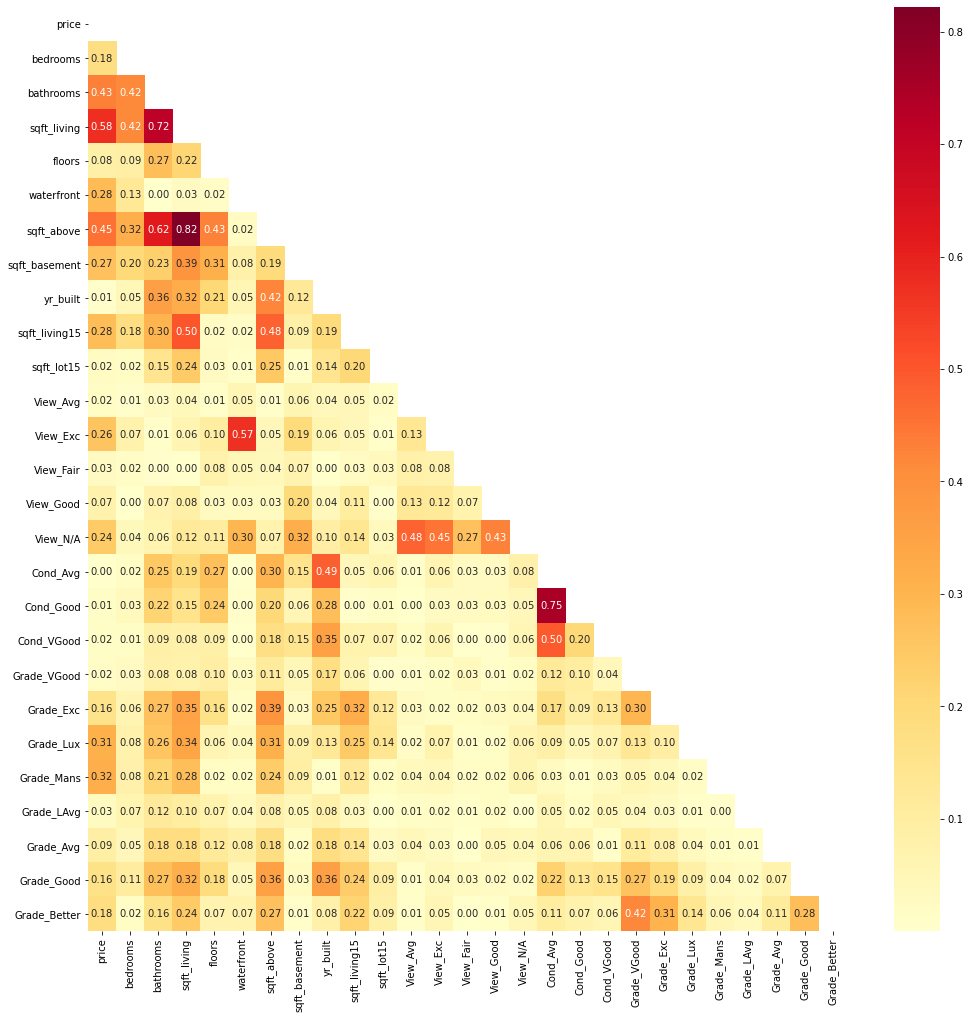

In [101]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_drop.corr(), dtype=bool))
sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_comparison.png', dpi=600);

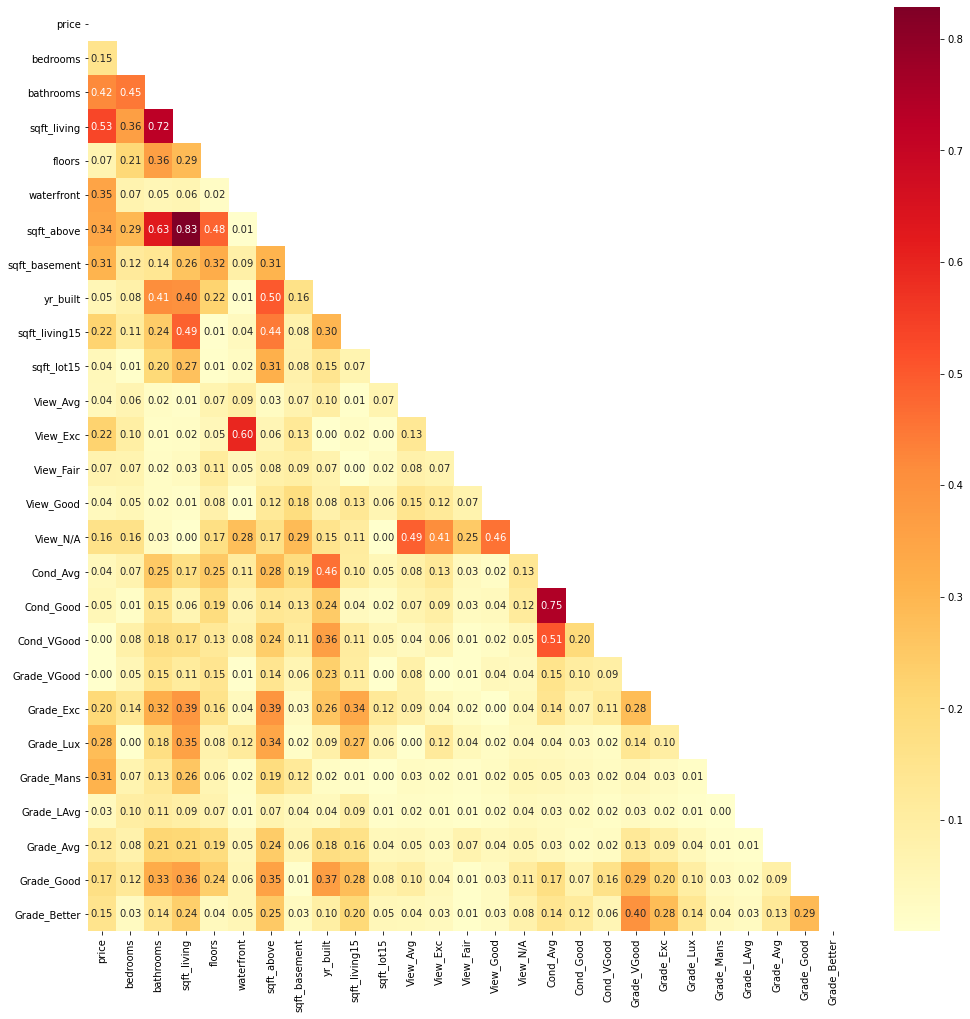

In [102]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_test_drop.corr(), dtype=bool))
sns.heatmap(rename_test_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_test_comparison.png', dpi=600);

## Linear Regression Time!!

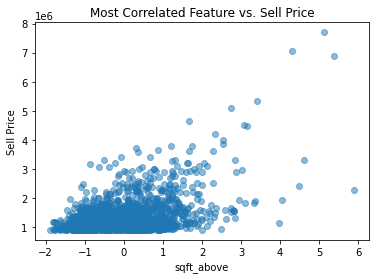

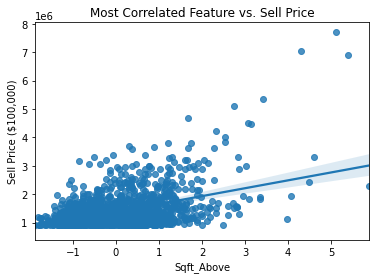

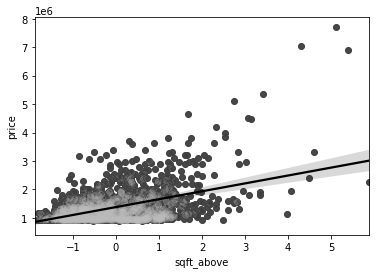

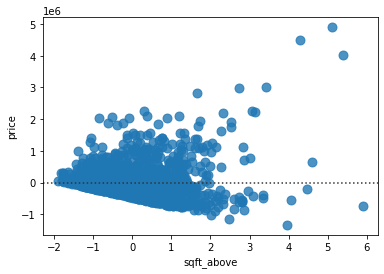

In [103]:
most_corr_feat = 'sqft_above'
fig, ax = plt.subplots()

ax.scatter(rename_drop[most_corr_feat], y_train, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat], y=y_train)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat],y=y_train, color="black")
ax3.scatter(rename_drop[most_corr_feat], y_train, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_drop[most_corr_feat], y=y_train,
              scatter_kws={"s": 80});

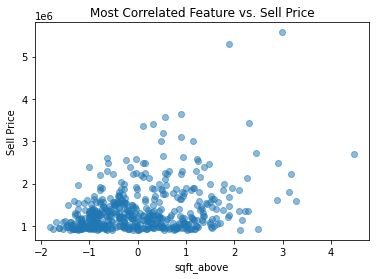

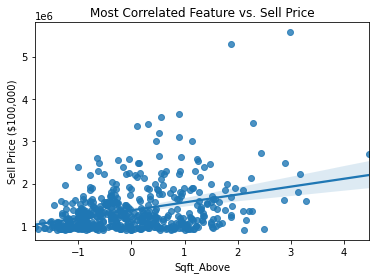

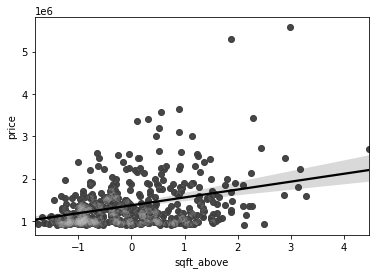

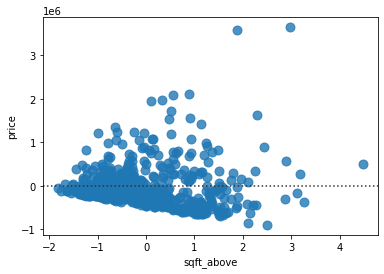

In [104]:
fig, ax = plt.subplots()

ax.scatter(rename_test_drop[most_corr_feat], y_test, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat], y=y_test)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_test_drop[most_corr_feat],y=y_test, color="black")
ax3.scatter(rename_test_drop[most_corr_feat], y_test, alpha = 0.15,color="silver")
plt.savefig('sick_scatter_linear_test.png', dpi=600);

fig, ax4 = plt.subplots()
sns.residplot(x=rename_test_drop[most_corr_feat], y=y_test,
              scatter_kws={"s": 80});

### "ShuffleSplit" cross validation scores using "Train" data

In [105]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_corr_feat]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.2197221213444467
Validation score: 0.13180651379815664


### "ShuffleSplit" cross validation scores using "Test" data

In [106]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_test[[most_corr_feat]],
    y=y_test,
    return_train_score=True,
    cv=splitter
)

print("Test score:     ", baseline_scores["test_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Test score:      0.08811027600828858
Validation score: 0.08811027600828858


###  OLS Regression of all variables - messy, complex, and not useful:

In [107]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     60.77
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          3.12e-222
Time:                        15:50:03   Log-Likelihood:                -21539.
No. Observations:                1500   AIC:                         4.314e+04
Df Residuals:                    1471   BIC:                         4.329e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.808e+06   3.26e+07      0.270      0.787   -5.52e+07    7.29e+07
id            -2.708e-06   3.92e-06     -0.691      0.490   -1.04e-05    4.98e-06
bedrooms      -3.855e+04   1.46e+04     -2.636      0.008   -6.72e+04   -9862.500
bathrooms      8.021e+04   1.97e+04      4.067      0.000    4.15e+04    1.19e+05
sqft_living      98.3500    119.644      0.822      0.411    -136.342     333.042
sqft_lot         -0.4627      0.291     -1.591      0.112      -1.033       0.108
floors        -1.746e+04   2.87e+04     -0.608      0.544   -7.38e+04    3.89e+04
waterfront     5.864e+05   6.13e+04      9.563      0.000    4.66e+05    7.07e+05
sqft_above      160.4615    120.807      1.328      0.184     -76.512     397.435
sqft_basement   113.2504    120.028      0.944      0.346    -122.193     348.694
yr_built      -5036.8671    472.614    -10.657      0.000   -5963.936   -4109.798
zipcode       -1254.3318    239.824     -5.230      0.000   -1724.765    -783.899
sqft_living15   -57.5090     17.410     -3.303      0.001     -91.661     -23.357
sqft_lot15       -1.3591      0.464     -2.926      0.003      -2.270      -0.448
date_num        591.7043    240.899      2.456      0.014     119.163    1064.246
basement_?    -7.495e+04   1.04e+05     -0.720      0.472   -2.79e+05    1.29e+05
AVERAGE        1.695e+06   6.53e+06      0.260      0.795   -1.11e+07    1.45e+07
EXCELLENT      1.864e+06   6.53e+06      0.285      0.775   -1.09e+07    1.47e+07
FAIR            1.82e+06   6.53e+06      0.279      0.780    -1.1e+07    1.46e+07
GOOD           1.771e+06   6.53e+06      0.271      0.786    -1.1e+07    1.46e+07
NONE           1.658e+06   6.53e+06      0.254      0.799   -1.11e+07    1.45e+07
Average        2.897e+06   1.09e+07      0.266      0.790   -1.85e+07    2.42e+07
Good            2.96e+06   1.09e+07      0.272      0.786   -1.84e+07    2.43e+07
Very Good      2.952e+06   1.09e+07      0.271      0.786   -1.84e+07    2.43e+07
10 Very Good   9.715e+05   4.08e+06      0.238      0.812   -7.03e+06    8.98e+06
11 Excellent   1.018e+06   4.08e+06      0.249      0.803   -6.99e+06    9.02e+06
12 Luxury      1.432e+06   4.08e+06      0.351      0.726   -6.58e+06    9.44e+06
13 Mansion     2.273e+06   4.09e+06      0.556      0.578   -5.75e+06    1.03e+07
6 Low Average  7.854e+05   4.08e+06      0.193      0.847   -7.22e+06    8.79e+06
7 Average      6.946e+05   4.08e+06      0.170      0.865   -7.31e+06     8.7e+06
8 Good         7.554e+05   4.08e+06      0.185      0.853   -7.25e+06    8.76e+06
9 Better       8.786e+05   4.08e+06      0.215      0.830   -7.13e+06    8.89e+06
==============================================================================
Omnibus:                      442.300   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB

##  Narrowing it down to a one or two at a time:

In [108]:
formula = 'price ~ sqft_living'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     750.9
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          2.40e-134
Time:                        15:50:04   Log-Likelihood:                -21811.
No. Observations:                1500   AIC:                         4.363e+04
Df Residuals:                    1498   BIC:                         4.364e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.382e+06   1.29e+04    107.047      0.000    1.36e+06    1.41e+06
sqft_living  3.538e+05   1.29e+04     27.403      0.000    3.28e+05    3.79e+05
==============================================================================
Omnibus:                      617.802   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4700.533
Skew:                           1.734   Prob(JB):                         0.00
Kurtosis:                      10.949   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          1.32e-162
Time:                        15:50:04   Log-Likelihood:                -21736.
No. Observations:                1500   AIC:                         4.348e+04
Df Residuals:                    1495   BIC:                         4.351e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.382e+06   1.23e+04    112.420      0.000    1.36e+06    1.41e+06
sqft_living  3.239e+05   1.44e+04     22.557      0.000    2.96e+05    3.52e+05
Grade_Exc   -7514.8256   1.35e+04     -0.555      0.579   -3.41e+04     1.9e+04
Grade_Lux    6.969e+04   1.35e+04      5.153      0.000    4.32e+04    9.62e+04
View_Exc     1.351e+05   1.23e+04     10.947      0.000    1.11e+05    1.59e+05
==============================================================================
Omnibus:                      612.148   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6361.447
Skew:                           1.608   Prob(JB):                         0.00
Kurtosis:                      12.562   Cond. No.                         1.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
formula = 'price ~ sqft_living + Grade_Exc + Grade_Lux + View_Exc'
sqft_above_mod = ols(formula = formula, data = rename_test_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     62.98
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           5.08e-43
Time:                        15:50:04   Log-Likelihood:                -7211.8
No. Observations:                 500   AIC:                         1.443e+04
Df Residuals:                     495   BIC:                         1.445e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.372e+06      2e+04     68.668      0.000    1.33e+06    1.41e+06
sqft_living  2.641e+05    2.4e+04     11.019      0.000    2.17e+05    3.11e+05
Grade_Exc    1.883e+04   2.25e+04      0.836      0.404   -2.54e+04    6.31e+04
Grade_Lux    5.037e+04   2.23e+04      2.255      0.025    6485.501    9.43e+04
View_Exc     1.125e+05   2.01e+04      5.587      0.000    7.29e+04    1.52e+05
==============================================================================
Omnibus:                      221.304   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1429.914
Skew:                           1.817   Prob(JB):                    3.15e-311
Kurtosis:                      10.445   Cond. No.                         1.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  So I get best results, that I've been able to figure out, from price vs multivariate (sqft_living + Grade_Exc + Grade_Lux + View_Exc)  Best R2/AdjR2 I've found is 0.529 from the Training data, and 0.523 from the matching Test data. (all above)

In [111]:
formula = 'price ~ Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           3.04e-47
Time:                        15:50:04   Log-Likelihood:                -22008.
No. Observations:                1500   AIC:                         4.402e+04
Df Residuals:                    1497   BIC:                         4.404e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.382e+06   1.47e+04     93.815      0.000    1.35e+06    1.41e+06
Grade_Exc   1.161e+05   1.48e+04      7.841      0.000     8.7e+04    1.45e+05
Grade_Lux   2.028e+05   1.48e+04     13.701      0.000    1.74e+05    2.32e+05
==============================================================================
Omnibus:                     1203.030   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40733.445
Skew:                           3.478   Prob(JB):                         0.00
Kurtosis:                      27.563   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
formula = 'price ~ sqft_living15 + sqft_living + bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     189.5
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          1.83e-131
Time:                        15:50:04   Log-Likelihood:                -21808.
No. Observations:                1500   AIC:                         4.363e+04
Df Residuals:                    1495   BIC:                         4.365e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.382e+06   1.29e+04    107.143      0.000    1.36e+06    1.41e+06
sqft_living15 -2342.0892   1.52e+04     -0.154      0.877   -3.21e+04    2.74e+04
sqft_living    3.716e+05   2.63e+04     14.115      0.000     3.2e+05    4.23e+05
bathrooms      2.735e+04   1.86e+04      1.468      0.142   -9184.556    6.39e+04
sqft_above    -4.397e+04    2.3e+04     -1.913      0.056   -8.91e+04    1111.185
==============================================================================
Omnibus:                      622.527   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4802.747
Skew:                           1.745   Prob(JB):                         0.00
Kurtosis:                      11.041   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Below, we see that sqft_living correlates strongly with bathrooms and sqft_above, so these three should probably not be used together

In [113]:
formula = 'sqft_living ~ bathrooms + sqft_above'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2194.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:50:04   Log-Likelihood:                -1101.7
No. Observations:                1500   AIC:                             2209.
Df Residuals:                    1497   BIC:                             2225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.807e-16      0.013   1.39e-14      1.000      -0.026       0.026
bathrooms      0.3358      0.017     20.258      0.000       0.303       0.368
sqft_above     0.6148      0.017     37.091      0.000       0.582       0.647
==============================================================================
Omnibus:                      266.362   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.574
Skew:                           1.034   Prob(JB):                    3.39e-119
Kurtosis:                       5.110   Cond. No.                         2.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
formula = 'sqft_living ~ View_Exc + Grade_Exc + Grade_Lux'
sqft_above_mod = ols(formula = formula, data = rename_drop).fit()
sqft_above_summ = sqft_above_mod.summary()
baseline = sqft_above_summ
baseline

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sqft_living   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 04 Oct 2021   Prob (F-statistic):          2.02e-100
Time:                        15:50:04   Log-Likelihood:                -1895.5
No. Observations:                1500   AIC:                             3799.
Df Residuals:                    1496   BIC:                             3820.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.665e-16      0.022   7.52e-15      1.000      -0.043       0.043
View_Exc       0.0424      0.022      1.912      0.056      -0.001       0.086
Grade_Exc      0.3857      0.022     17.341      0.000       0.342       0.429
Grade_Lux      0.3786      0.022     16.978      0.000       0.335       0.422
==============================================================================
Omnibus:                      638.445   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6041.915
Skew:                           1.728   Prob(JB):                         0.00
Kurtosis:                      12.205   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Just checking the VIF of this:

In [115]:
vif = [variance_inflation_factor(rename_drop.values,i) for i in range(rename_drop.shape[1])]
pd.Series(vif, index=rename_drop.columns, name = "Variance Inflation Factor")

F:\Flatiron\Anaconda2\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


price              1.094254
bedrooms           1.380637
bathrooms          2.366607
sqft_living      101.194020
floors             1.512888
waterfront         1.566631
sqft_above        89.994081
sqft_basement     33.423706
yr_built           1.740168
sqft_living15      1.649199
sqft_lot15         1.108345
View_Avg                inf
View_Exc                inf
View_Fair               inf
View_Good               inf
View_N/A                inf
Cond_Avg                inf
Cond_Good               inf
Cond_VGood              inf
Grade_VGood             inf
Grade_Exc               inf
Grade_Lux               inf
Grade_Mans              inf
Grade_LAvg              inf
Grade_Avg               inf
Grade_Good              inf
Grade_Better            inf
Name: Variance Inflation Factor, dtype: float64

####  NOT GOOD!!  We don't want any values > 5, and 3 of these are, so we may have too much multicollinearity.